In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

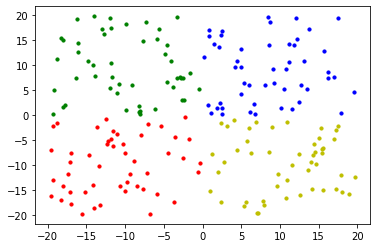

In [2]:
# Prevent divide by 0 errors
np.seterr(divide='ignore', invalid='ignore')
# Generate 4 groups of random 2d data
bgroup = 20 * np.random.rand(200, 2)
rgroup = -20 * np.random.rand(50, 2)
ggroup = 20 * np.random.rand(50, 2) - 50 * [[20, 0]]
ygroup = 20 * np.random.rand(50, 2) - 50 * [[0, 20]]
# Replace the quadrants of bgroup with the other groups
bgroup[50:100, :] = rgroup
bgroup[100:150, :] = ggroup
bgroup[150:200, :] = ygroup
plt.scatter(bgroup[0:50, 0], bgroup[0:50, 1], s = 10, c = 'b')
plt.scatter(bgroup[50:100, 0], bgroup[50:100, 1], s = 10, c = 'r')
plt.scatter(bgroup[100:150, 0], bgroup[100:150, 1], s = 10, c = 'g')
plt.scatter(bgroup[150:200, 0], bgroup[150:200, 1], s = 10, c = 'y')
plt.show()

In [3]:
Kmean = KMeans(n_clusters = 4)
Kmean.fit(bgroup)
Kmean.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 1 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


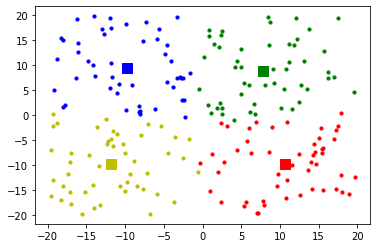

In [4]:
print(Kmean.labels_)
labels = Kmean.labels_
centroids = Kmean.cluster_centers_

for i in range(200):
    if labels[i] == 0:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'b')
    if labels[i] == 1:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'r')
    if labels[i] == 2:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'g')
    if labels[i] == 3:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'y')

plt.scatter(centroids[0][0], centroids[0][1], s = 100, c = 'b', marker='s')
plt.scatter(centroids[1][0], centroids[1][1], s = 100, c = 'r', marker='s')
plt.scatter(centroids[2][0], centroids[2][1], s = 100, c = 'g', marker='s')
plt.scatter(centroids[3][0], centroids[3][1], s = 100, c = 'y', marker='s')

plt.show()

In [41]:
# Our KMeans class
class KMemes:
    # Constructor
    def __init__(self, n_clusters, n_init):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.labels_ = []
        self.centroids = []
        self.fitted = False

    # array has 2 axes- (number of points, dimensions per point)
    def fit(self, array):
        # Get number of dimensions for each point
        self.point_dimensions = np.shape(array)[1]
        # resize centroids
        self.centroids = np.random.rand(self.n_clusters, self.point_dimensions)
        # labels has an int representing a centroids index for each point
        self.labels_ = np.zeros(shape=(np.shape(array)[0]), dtype = int)
        # Used to compare different runs against each other
        self.best_distance = sys.maxsize # infinity
        # Number of iterations on best run
        self.best_iterations = 0

        # This loop tries out n_init different fits
        for i in range(self.n_init):
            # Used to measure how many iterations were run
            iterations = 0
            # Randomly select centroids (don't directly change self.centroids yet)
            new_centroids = np.random.rand(self.n_clusters, self.point_dimensions)
            new_labels = np.zeros(shape=(np.shape(array)[0]), dtype = int)
            prev_distance = sys.maxsize

            # This loop improves the fits
            while True:
                iterations += 1
                # Get the closest centroid for each data point
                # We don't want to edit new_centroids just yet
                _new_centroids = new_centroids
                _array = array
                numcentroids = len(_new_centroids)
                numpoints = len(_array)
                # vector dark magic- tiling (repeating) arrays to get pair differences
                _new_centroids = np.repeat([_new_centroids], numpoints, axis = 0)
                _new_centroids = _new_centroids.reshape(_new_centroids.size).reshape((numpoints * numcentroids), self.point_dimensions)
                _array = np.repeat([_array], numcentroids, axis = 1)
                # finding Euclidean distances in vectorizalied way
                square_distances = (_new_centroids - _array)**2
                square_distances = square_distances.sum(axis = 2).reshape(numpoints, numcentroids)
                # new_labels gets the indicies of the closest centroids for each point
                new_labels = np.argmin(square_distances, axis = 1)
                # sum of distances in this iteration (we want to decrease this)
                current_distance = square_distances[np.linspace(0, len(square_distances)-1, len(square_distances),dtype=int), new_labels].sum()

                # Update centroids with means of each cluster:
                # Sum of coordinates of all points in each cluster
                cluster_coordinate_sums = np.zeros((self.n_clusters, self.point_dimensions), dtype=float)
                # Number of points in each cluster
                cluster_numberof_points = np.zeros(self.n_clusters)
                # Check which centroid for every point and get the mean locations of each cluster
                np.add.at(cluster_coordinate_sums, new_labels, array)
                np.add.at(cluster_numberof_points, new_labels, 1)

                cluster_numberof_points = cluster_numberof_points.reshape(np.shape(cluster_numberof_points)[0], 1)
                new_centroids = cluster_coordinate_sums / cluster_numberof_points
                # Stop iterating once the distance has stopped decreasing
                if np.abs(prev_distance - current_distance) < 0.1 or iterations > 300:
                    self.fitted = True
                    if current_distance < self.best_distance:
                        self.best_distance = current_distance
                        self.best_iterations = iterations
                        # Update the actual centroids and labels
                        self.centroids = new_centroids
                        self.labels_ = new_labels
                    break
                prev_distance = current_distance

    def debugprint(self):
        if self.fitted == False:
            print("Not fitted")
            return
        print("centroids: " + str(self.centroids))
        print("labels: " + str(self.labels_))   
        print("iterations: " + str(self.best_iterations))
        print("distance sum: " + str(self.best_distance))


centroids: [[7.746699 8.484899]
 [-9.772159 9.433210]
 [11.062471 -9.973813]
 [-11.544772 -9.920588]]
labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1
 1 1 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
iterations: 11
distance sum: 12630.796261921632


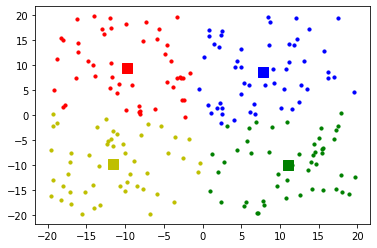

In [43]:
myKmeans = KMemes(n_clusters = 4, n_init = 50)
myKmeans.fit(bgroup)
myKmeans.debugprint()

myLabels = myKmeans.labels_
myCentroids = myKmeans.centroids

for i in range(200):
    if myLabels[i] == 0:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'b')
    if myLabels[i] == 1:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'r')
    if myLabels[i] == 2:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'g')
    if myLabels[i] == 3:
        plt.scatter(bgroup[i][0], bgroup[i][1], s = 10, c = 'y')

plt.scatter(myCentroids[0][0], myCentroids[0][1], s = 100, c = 'b', marker='s')
plt.scatter(myCentroids[1][0], myCentroids[1][1], s = 100, c = 'r', marker='s')
plt.scatter(myCentroids[2][0], myCentroids[2][1], s = 100, c = 'g', marker='s')
plt.scatter(myCentroids[3][0], myCentroids[3][1], s = 100, c = 'y', marker='s')

plt.show()

In [7]:
# Import the spotify data
data_raw = pd.read_csv('data_by_artist_o.csv')

In [21]:
# Useful function from StackOverflow
# Prevent the distances from being too large and breaking the model
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [22]:
# Drop useless columns
data = data_raw.drop(columns = ['genres', 'artists', 'duration_ms', 'count', 'key'])
# Prevent distances from getting larger than sys.maxsize
data['loudness'] = NormalizeData(data['loudness'])
data['tempo'] = NormalizeData(data['tempo'])
data['popularity'] = NormalizeData(data['popularity'])
data = data.dropna()

In [23]:
# Fit scikit model to data
scikitFit = KMeans()
scikitFit.fit(data)
scikitFit.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [44]:
# Fit our model to data
ourFit = KMemes(n_clusters = 8, n_init = 30)
ourFit.fit(data)

In [45]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print(scikitFit.cluster_centers_)
print()
print(ourFit.centroids)

[[0.905891 0.369980 0.204295 0.062292 0.205081 0.715402 0.064445 0.480077
  0.268695 0.186840 1.000000]
 [0.123851 0.622518 0.720335 0.025238 0.198052 0.861549 0.100406 0.566161
  0.591462 0.508604 1.000000]
 [0.175363 0.648499 0.691997 0.097217 0.194099 0.855787 0.114441 0.552904
  0.563797 0.503784 -0.000000]
 [0.857762 0.454343 0.286915 0.352895 0.201098 0.723450 0.084379 0.500969
  0.434145 0.235051 -0.000000]
 [0.913510 0.370895 0.202106 0.783005 0.170618 0.668644 0.057850 0.477928
  0.322952 0.247428 1.000000]
 [0.528978 0.579074 0.477835 0.030159 0.189694 0.811702 0.074780 0.539715
  0.552859 0.474003 1.000000]
 [0.148182 0.534820 0.695450 0.693177 0.209199 0.813542 0.062982 0.558836
  0.441936 0.352352 1.000000]
 [0.869045 0.573870 0.363633 0.123525 0.262549 0.777592 0.151726 0.523545
  0.678073 0.082754 1.000000]]

[[0.906032 0.369179 0.203597 0.062546 0.204601 0.715066 0.063652 0.480009
  0.267525 0.187210 1.000000]
 [0.149751 0.534201 0.694064 0.693655 0.209067 0.813324 0.06

10